## Analysis

In [2]:

import pandas as pd

#folder = "../workdir/AIS-ModelFrames/"
folderinput = "../workdir/AIS-TrainedModel/"
folderoutput = "../workdir/AIS-Images/aisdk-2023-11-08-s_2-18000/"
filename = "aisdk-2023-11-08-s_2_kkn_result_18000_10240"

pd.set_option("display.float_format", lambda x: '%.1f' % x)

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


#df_res_dis["bl_3_0"] = pd.DataFrame(df_res["bl_3_0"].describe())
df_res_dis = [0]*4*3*4
print(type(df_res_dis))
i = 0

for known in range(3, 13, 3):
    for noise in range(0, 11, 5):
        for alg in ("bl", "lr", "nn", "as"):

            # Baseline
            # print(f"bl_{known}_{noise}")
            df_res_dis[i] = (df_res[f"{alg}_{known}_{noise}"].describe())

            # # print(df_res_dis)
            # # Linear Regression
            # print(f"lr_{known}_{noise}")
            # print(df_res[f"lr_{known}_{noise}"].describe())
            # df_res_dis[i] = (df_res[f"bl_{known}_{noise}"].describe())

            # # Neural Network
            # print(f"nn_{known}_{noise}")
            # print(df_res[f"nn_{known}_{noise}"].describe())
            # df_res_dis[i] = (df_res[f"bl_{known}_{noise}"].describe())

            # # AutoSklearn
            # # print(f"as_{known}_{noise}")
            # # print(df_res[f"as_{known}_{noise}"].describe())
            # df_res_dis[i] = (df_res[f"bl_{known}_{noise}"].describe())
            i = i + 1



df_res_dis = str(df_res_dis)

df_res_dis = df_res_dis.replace("           ", ";")
df_res_dis = df_res_dis.replace("          ", ";")
df_res_dis = df_res_dis.replace("         ", ";")
df_res_dis = df_res_dis.replace("        ", ";")
df_res_dis = df_res_dis.replace("       ", ";")
df_res_dis = df_res_dis.replace("      ", ";")
df_res_dis = df_res_dis.replace("     ", ";")
df_res_dis = df_res_dis.replace("    ", ";")
df_res_dis = df_res_dis.replace("   ", ";")
df_res_dis = df_res_dis.replace("  ", ";")
df_res_dis = df_res_dis.replace("   ", ";")

print(df_res_dis)



#df_res_dis = df_res_dis.replace("\r\n", "\\ \r\n")

## creating a new empty file or overwriting existend file
save_file = open(f"{folderoutput}{filename}_describe.csv", "a")
save_file.write(df_res_dis)
save_file.close()


<class 'list'>
[count;1206272.0
mean;26.3
std;25.1
min;0.0
25%;4.4
50%;15.4
75%;46.3
max;218.2
Name: bl_3_0, dtype: float64, count;1206272.0
mean;8.0
std;12.4
min;0.0
25%;1.3
50%;3.3
75%;9.1
max;194.1
Name: lr_3_0, dtype: float64, count;1206272.0
mean;3.6
std;5.1
min;0.0
25%;0.9
50%;2.0
75%;4.3
max;149.1
Name: nn_3_0, dtype: float64, count;1206272.0
mean;4.1
std;5.9
min;0.0
25%;1.0
50%;2.3
75%;5.0
max;215.6
Name: as_3_0, dtype: float64, count;1206272.0
mean;28.0
std;24.2
min;0.0
25%;8.1
50%;18.5
75%;46.5
max;230.6
Name: bl_3_5, dtype: float64, count;1206272.0
mean;12.5
std;12.0
min;0.0
25%;5.4
50%;9.2
75%;15.0
max;202.4
Name: lr_3_5, dtype: float64, count;1206272.0
mean;9.5
std;6.7
min;0.0
25%;4.9
50%;8.2
75%;12.4
max;156.9
Name: nn_3_5, dtype: float64, count;1206272.0
mean;9.9
std;7.5
min;0.0
25%;5.0
50%;8.4
75%;13.0
max;216.0
Name: as_3_5, dtype: float64, count;1206272.0
mean;30.9
std;23.8
min;0.0
25%;11.9
50%;24.0
75%;47.1
max;241.9
Name: bl_3_10, dtype: float64, count;1206272.0
mea

## Visualisation

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"
folderoutput = "../workdir/AIS-Images"

filename = f"aisdk-2023-11-08-xs_2_kkn"

df_res = pd.read_csv(f"{folderinput}{filename}_result.csv")

df_res.head(4)

,known_3_0,noise_3_0,bl_3_0,lr_3_0,nn_3_0,as_3_0,known_3_5,noise_3_5,bl_3_5,lr_3_5,...,bl_12_5,lr_12_5,nn_12_5,as_12_5,known_12_10,noise_12_10,bl_12_10,lr_12_10,nn_12_10,as_12_10
0,3,0,21.758906,0.731286,1.676282,3.771935,3,5,15.854942,12.451557,...,20.157151,5.676367,4.694914,255.699599,12,10,13.887946,11.281088,8.814110,258.174573
1,3,0,27.067508,13.418518,16.801331,11.726620,3,5,26.729935,14.115557,...,22.726005,8.609695,9.824121,250.942444,12,10,37.864443,21.143863,14.349431,241.612243
2,3,0,20.390194,0.756131,0.063243,3.810228,3,5,24.724901,9.682861,...,30.291721,15.669231,16.235433,261.750880,12,10,28.979272,7.343083,10.707935,261.876005
3,3,0,18.411410,1.013412,0.334302,1.082789,3,5,17.751914,6.737658,...,32.924392,16.158755,15.962080,295.122930,12,10,51.155298,40.990162,40.832444,303.870463


In [4]:
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"
folderoutput = "../workdir/AIS-Images/aisdk-2023-11-08-s_2-18000/"

filename = f"aisdk-2023-11-08-s_2_kkn_result_18000_10240"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


# BL vs XX 3 bis 12 -> 3 Bilder
for known in range(3, 13, 3):
    for noise in range(0, 11, 5):
#     for alg in ("lr", "nn", "as"):
        df_loc = df_res.copy()
        # df_loc = df_loc.filter(regex=f"bl|{alg}")
        df_loc = df_loc.filter(regex=f"_{known}_")
        df_loc = df_loc.filter(regex=f"_{noise}")
        df_loc = df_loc.filter(regex=f"bl|lr|ml|as")

        df_loc.boxplot()

        if noise == 0:
            plt.title(f"Vorhersage bei {known} bekannten Positionen ohne Rauschen")
        else:
            plt.title(f"Vorhersage bei {known} bekannten Positionen und \n einem norm. Rauschen mit {noise} m Standardabweichung")
       
        plt.legend(loc="upper left")

        #plt.xlabel('Bekannte Positionen')
        plt.ylabel('Präzession in [m]')

        
        plt.show
        plt.savefig(f"{folderoutput}{filename}_test_{known}_{noise}_X.png", bbox_inches='tight', dpi=600)
        df_loc = []
        plt.cla()
        



#     for noise in range(0, 11, 5):
        # df_res.copy(df_res)
        # df_res = df_res.drop(columns=[f"known_{known}_{noise}",f"noise_{known}_{noise}"])
        # 
        # status_codes = {
        # 0: "b",
        # 5: "y",
        # 10: "m"
        # }
        # color =  status_codes.get(noise, "r")


        #df_res[f"bl_{known}_{noise}"].plot(kind='box')
        #df_res.boxplot(column=f"bl_{known}_{noise}") #, label=f"bl_{known}_{noise}")

        #plt.plot(df_res[f"known_{known}_{noise}"], df_res[f"bl_{known}_{noise}"], f"-{color}", label=f"bl_{known}_{noise}")



# df_res.plot(kind='box')


# df_res = df_res.filter(regex='bl|as')
# df_res = df_res.drop(columns=['as_12_0'])
# df_res = df_res.drop(columns=['as_12_5'])
# df_res = df_res.drop(columns=['as_12_10'])

# df_res = df_res.filter(regex='bl')

# df_res["bl_3_0"].plot(kind='box')
# df_res["bl_3_5"].plot(kind='box')

# bp = plt.boxplot(df_res, patch_artist=True)

# Use a color palette
# colors = plt.cm.Set3(np.linespace(0, 1, len(df_res)))
# for patch, color in zip(bp["boxes"], colors):
#     patch.set_facecolor(colors)








C:\Users\Sese\AppData\Local\Temp\ipykernel_20408\1740931265.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")
C:\Users\Sese\AppData\Local\Temp\ipykernel_20408\1740931265.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")
C:\Users\Sese\AppData\Local\Temp\ipykernel_20408\1740931265.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")
C:\Users\Sese\AppData\Local\Temp\ipykernel_20408\1740931265.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored w

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"
folderoutput = "../workdir/AIS-Images/"

filename = f"aisdk-2023-11-08-s_2_kkn_result_18000_10240"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


# BL vs XX 3 bis 12 -> 3 Bilder
for noise in range(0, 11, 5):
    for alg in ("bl", "lr", "ml", "as"):
        df_loc = df_res.copy()
        # df_loc = df_loc.filter(regex=f"bl|{alg}")
        df_loc = df_loc.filter(regex=f"{alg}")
        #df_loc = df_loc.filter(regex=f"_{known}_")
        df_loc = df_loc.filter(regex=f"_{noise}")
        #df_loc = df_loc.filter(regex=f"bl|lr|nn|as")

        df_loc.boxplot()

        plt.title(f"Vorhersage bei norm. Rauschen mit {noise} m \n Standardabweichung und {alg}")
        plt.legend(loc="upper left")

        #plt.xlabel('Bekannte Positionen')
        plt.ylabel('Präzession in [m]')

        
        plt.show
        plt.savefig(f"{folderoutput}{filename}_test_X_{noise}_{alg}.png", bbox_inches='tight', dpi=600)
        df_loc = []
        plt.cla()

C:\Users\Sese\AppData\Local\Temp\ipykernel_20408\1408973919.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")
C:\Users\Sese\AppData\Local\Temp\ipykernel_20408\1408973919.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")
C:\Users\Sese\AppData\Local\Temp\ipykernel_20408\1408973919.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")
C:\Users\Sese\AppData\Local\Temp\ipykernel_20408\1408973919.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored w

<function matplotlib.pyplot.show(close=None, block=None)>

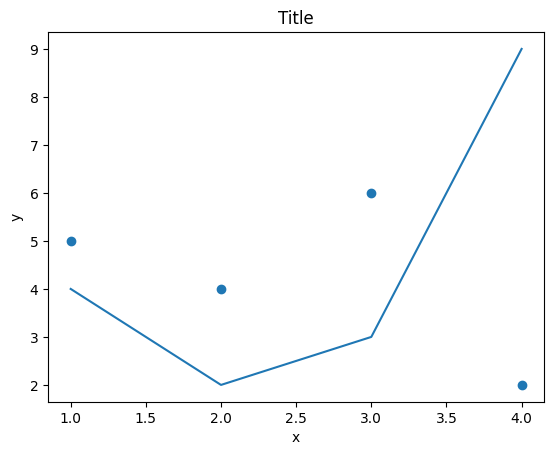

In [9]:
from matplotlib import pyplot as plt


x_values = [1, 2, 3 ,4]
y_values = [5, 4, 6, 2]

plt.scatter(x_values, y_values)

other_x_values = [1, 2, 3, 4]
other_y_values = [4, 2, 3, 9]

plt.plot(other_x_values, other_y_values)

plt.title('Title')

plt.xlabel('x')
plt.ylabel('y')

plt.show

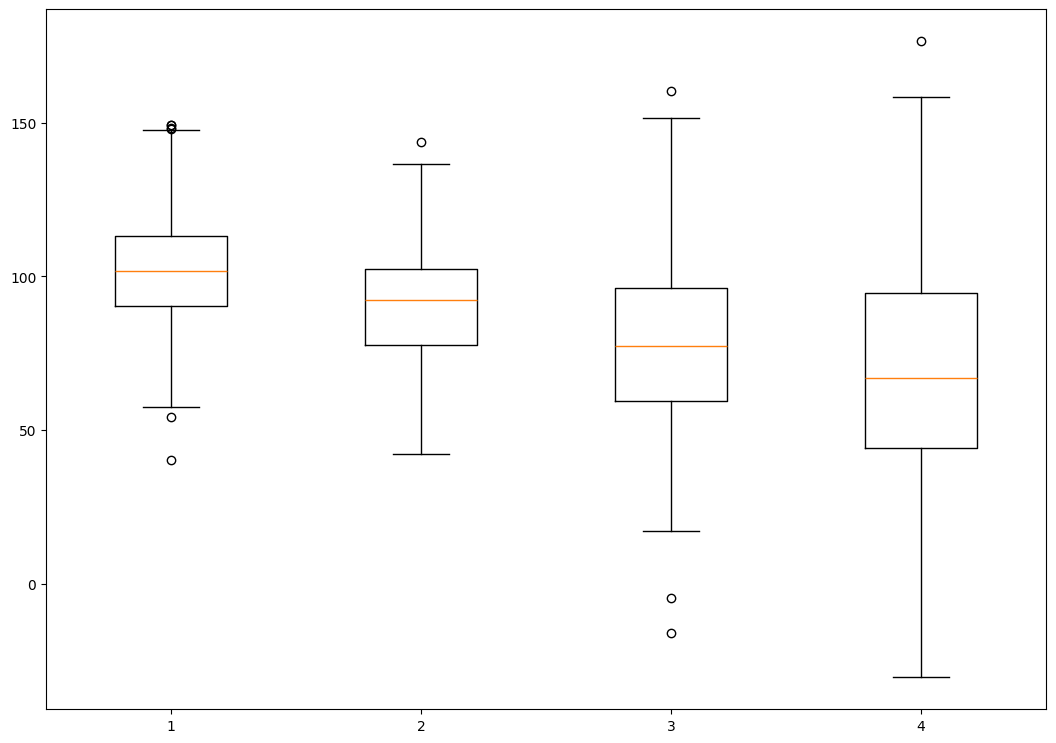

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creating dataset

np.random.seed(10)
data_1 = np.random.normal(100, 20, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)

data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10, 7))

# # Creating plot
# plt.boxplot(data)

# Crating axes instance

ax = fig.add_axes([0,0,1,1])

bp = ax.boxplot(data)

#show plot
plt.show()

#print(data)

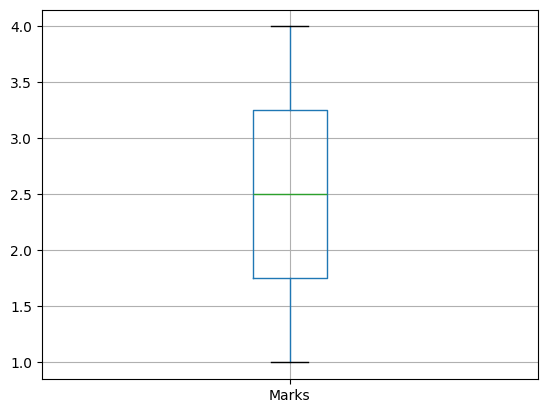

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# create a dataframe

data = pd.DataFrame({'Name' : ["A", "B", "C", "D"],
                     "Marks" : [1, 2, 3, 4],
                     "Credits": [16, 8, 4, 2]})

#box plot
# data["Marks"].plot(kind='box')
data.boxplot(column='Marks')
plt.show()